# Libraries

In [1505]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1506]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import metrics

# Data reading

In [1507]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prostate cancer/dataset/Prostate_Cancer.csv')

# Data Exploration

In [1508]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
diagnosis_result,M,B,M,M,M,B,M,M,M,M,M,M,B,M,M,M,M,M,M,B,B,B,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,B,M,M,...,B,B,M,B,M,M,B,B,B,B,M,B,M,M,B,M,B,M,M,B,B,B,M,M,B,M,M,M,B,B,B,M,B,B,M,M,B,B,B,M
radius,23,9,21,14,9,25,16,15,19,25,24,17,14,12,12,22,10,15,20,17,16,17,20,19,9,19,10,16,15,11,11,23,20,11,16,10,18,21,11,10,...,15,25,12,24,16,11,12,18,16,17,21,9,21,22,18,21,10,11,16,22,10,17,10,20,25,14,19,19,11,12,23,10,14,10,22,23,22,19,21,16
texture,12,13,27,16,19,25,26,18,24,11,21,15,15,22,13,19,16,14,14,11,14,24,27,12,13,27,24,24,15,16,22,26,18,21,23,13,12,11,15,14,...,18,15,22,17,19,21,13,12,17,21,18,26,12,25,13,18,17,21,18,16,18,21,15,14,21,13,26,11,11,23,27,12,14,17,26,16,14,27,24,27
perimeter,151,133,130,78,135,83,120,90,88,84,103,104,132,104,94,97,95,108,130,87,86,60,103,137,110,116,97,122,102,115,125,78,113,128,107,110,94,83,96,88,...,65,55,96,59,83,97,60,72,59,81,124,59,114,90,79,104,88,120,144,83,74,86,172,129,77,121,94,122,80,96,95,100,85,87,100,132,78,62,74,94
area,954,1326,1203,386,1297,477,1040,578,520,476,798,781,1123,783,578,659,685,799,1260,566,520,274,704,1404,905,913,645,1094,732,955,1088,441,899,1162,807,870,633,524,699,559,...,312,222,646,261,499,668,269,394,251,503,1130,244,929,584,471,818,559,1006,1245,506,402,520,1878,1132,443,1075,648,1076,466,652,663,728,552,555,706,1264,451,295,413,643
smoothness,0.143,0.143,0.125,0.07,0.141,0.128,0.095,0.119,0.127,0.119,0.082,0.097,0.097,0.084,0.113,0.114,0.099,0.117,0.098,0.098,0.108,0.102,0.107,0.094,0.112,0.119,0.105,0.094,0.108,0.098,0.106,0.111,0.12,0.094,0.104,0.096,0.098,0.09,0.094,0.102,...,0.113,0.124,0.105,0.077,0.112,0.117,0.104,0.081,0.107,0.098,0.09,0.098,0.107,0.101,0.092,0.092,0.129,0.107,0.129,0.099,0.11,0.108,0.106,0.122,0.097,0.099,0.094,0.09,0.088,0.113,0.09,0.092,0.074,0.102,0.104,0.091,0.105,0.102,0.09,0.098
compactness,0.278,0.079,0.16,0.284,0.133,0.17,0.109,0.165,0.193,0.24,0.067,0.129,0.246,0.1,0.229,0.16,0.072,0.202,0.103,0.081,0.127,0.065,0.214,0.102,0.146,0.228,0.187,0.107,0.17,0.116,0.189,0.152,0.15,0.172,0.156,0.134,0.11,0.038,0.051,0.126,...,0.081,0.09,0.201,0.088,0.126,0.148,0.078,0.047,0.141,0.052,0.103,0.153,0.183,0.128,0.068,0.084,0.105,0.215,0.345,0.095,0.094,0.154,0.267,0.179,0.072,0.105,0.099,0.121,0.094,0.134,0.086,0.104,0.051,0.082,0.155,0.131,0.071,0.053,0.075,0.114
symmetry,0.242,0.181,0.207,0.26,0.181,0.209,0.179,0.22,0.235,0.203,0.153,0.184,0.24,0.185,0.207,0.23,0.159,0.216,0.158,0.189,0.197,0.182,0.252,0.177,0.2,0.304,0.225,0.17,0.193,0.174,0.218,0.23,0.225,0.185,0.2,0.19,0.189,0.147,0.157,0.172,...,0.274,0.183,0.195,0.234,0.191,0.195,0.172,0.152,0.211,0.159,0.158,0.19,0.193,0.166,0.172,0.18,0.24,0.215,0.291,0.172,0.184,0.194,0.183,0.163,0.208,0.213,0.208,0.195,0.193,0.212,0.169,0.172,0.139,0.164,0.186,0.21,0.19,0.135,0.162,0.188
fractal_dimension,0.079,0.057,0.06,0.097,0.059,0.076,0.057,0.075,0.074,0.082,0.057,0.061,0.078,0.053,0.077,0.071,0.059,0.074,0.054,0.058,0.068,0.069,0.07,0.053,0.063,0.074,0.069,0.057,0.065,0.061,0.062,0.078,0.064,0.063,0.065,0.057,0.061,0.059,0.055,0.064,...,0.07,0.068,0.073,0.07,0.066,0.067,0.069,0.057,0.08,0.057,0.055,0.09,0.065,0.066,0.059,0.054,0.066,0.067,0.081,0.06,0.07,0.069,0.068,0.072,0.06,0.06,0.056,0.056,0.064,0.063,0.059,0.061,0.053,0.057,0.063,0.056,0.066,0.069,0.066,0.064


In [1509]:
columns=df.columns
columns_new=[]
for i in columns:
    columns_new.append(any(df[i].isnull()|df[i].isnull()))
df=df.drop(columns[columns_new],axis=1)

In [1510]:
{'unique patients':len(df.id.unique()), 'records':len(df.id)}

{'records': 100, 'unique patients': 100}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


M    62
B    38
Name: diagnosis_result, dtype: int64

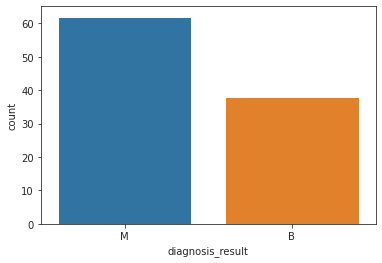

In [1511]:
ax = sns.countplot(df.diagnosis_result,label="Count")       # M = 212, B = 357
df.diagnosis_result.value_counts()

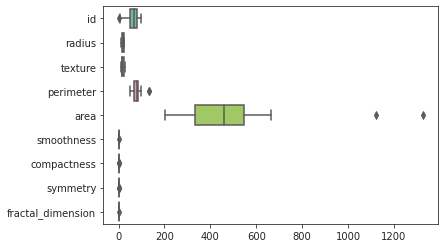

In [1512]:
ax = sns.boxplot( palette="Set2", orient="h",data=df[df.diagnosis_result=='B'])

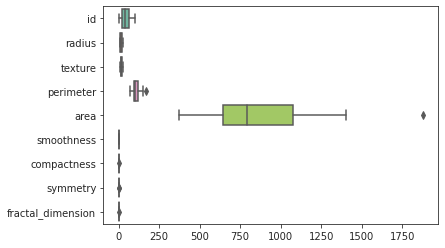

In [1513]:
ax = sns.boxplot( palette="Set2", orient="h",data=df[df.diagnosis_result=='M'])

# Train and Test spliting

In [1514]:
X_train, X_test, y_train, y_test=train_test_split(
    df.drop(['id','diagnosis_result'], axis=1),
    df[['diagnosis_result']],
    test_size=0.3,
    random_state=41)

In [1515]:
X_train.shape

(70, 8)

# Removing outliers

In [1516]:
for column in X_train.columns:
    
    df_train1 = X_train[(y_train.diagnosis_result=='B') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    df_test1 = X_test[(y_test.diagnosis_result=='B') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    
    label_train1 = y_train[(y_train.diagnosis_result=='B') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    label_test1 = y_test[(y_test.diagnosis_result=='B') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='B',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='B',column]))]
    
    df_train2 = X_train[(y_train.diagnosis_result=='M') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]
    df_test2 = X_test[(y_test.diagnosis_result=='M') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]
    
    label_train2 = y_train[(y_train.diagnosis_result=='M') & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]
    label_test2 = y_test[(y_test.diagnosis_result=='M') & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result=='M',column])+3*np.std(X_train.loc[y_train.diagnosis_result=='M',column]))]    

In [1517]:
X_train=pd.concat([df_train1,df_train2])
y_train=pd.concat([label_train1,label_train2])

X_test=pd.concat([df_test1,df_test2])
y_test=pd.concat([label_test1,label_test2])

X_train.shape

(68, 8)

# Removing correlated features

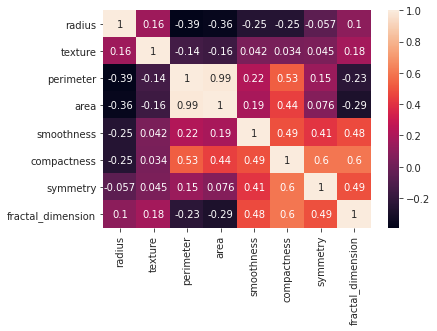

In [1518]:
corrMatrix = X_train.corr()
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

In [1519]:

correlated_features = set()
for i in range(len(corrMatrix .columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.7:
            colname = corrMatrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'area'}


In [1520]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

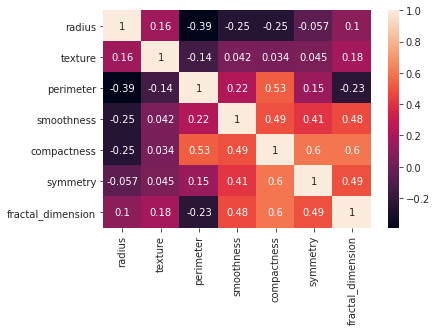

In [1521]:
corrMatrix = X_train.corr()
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


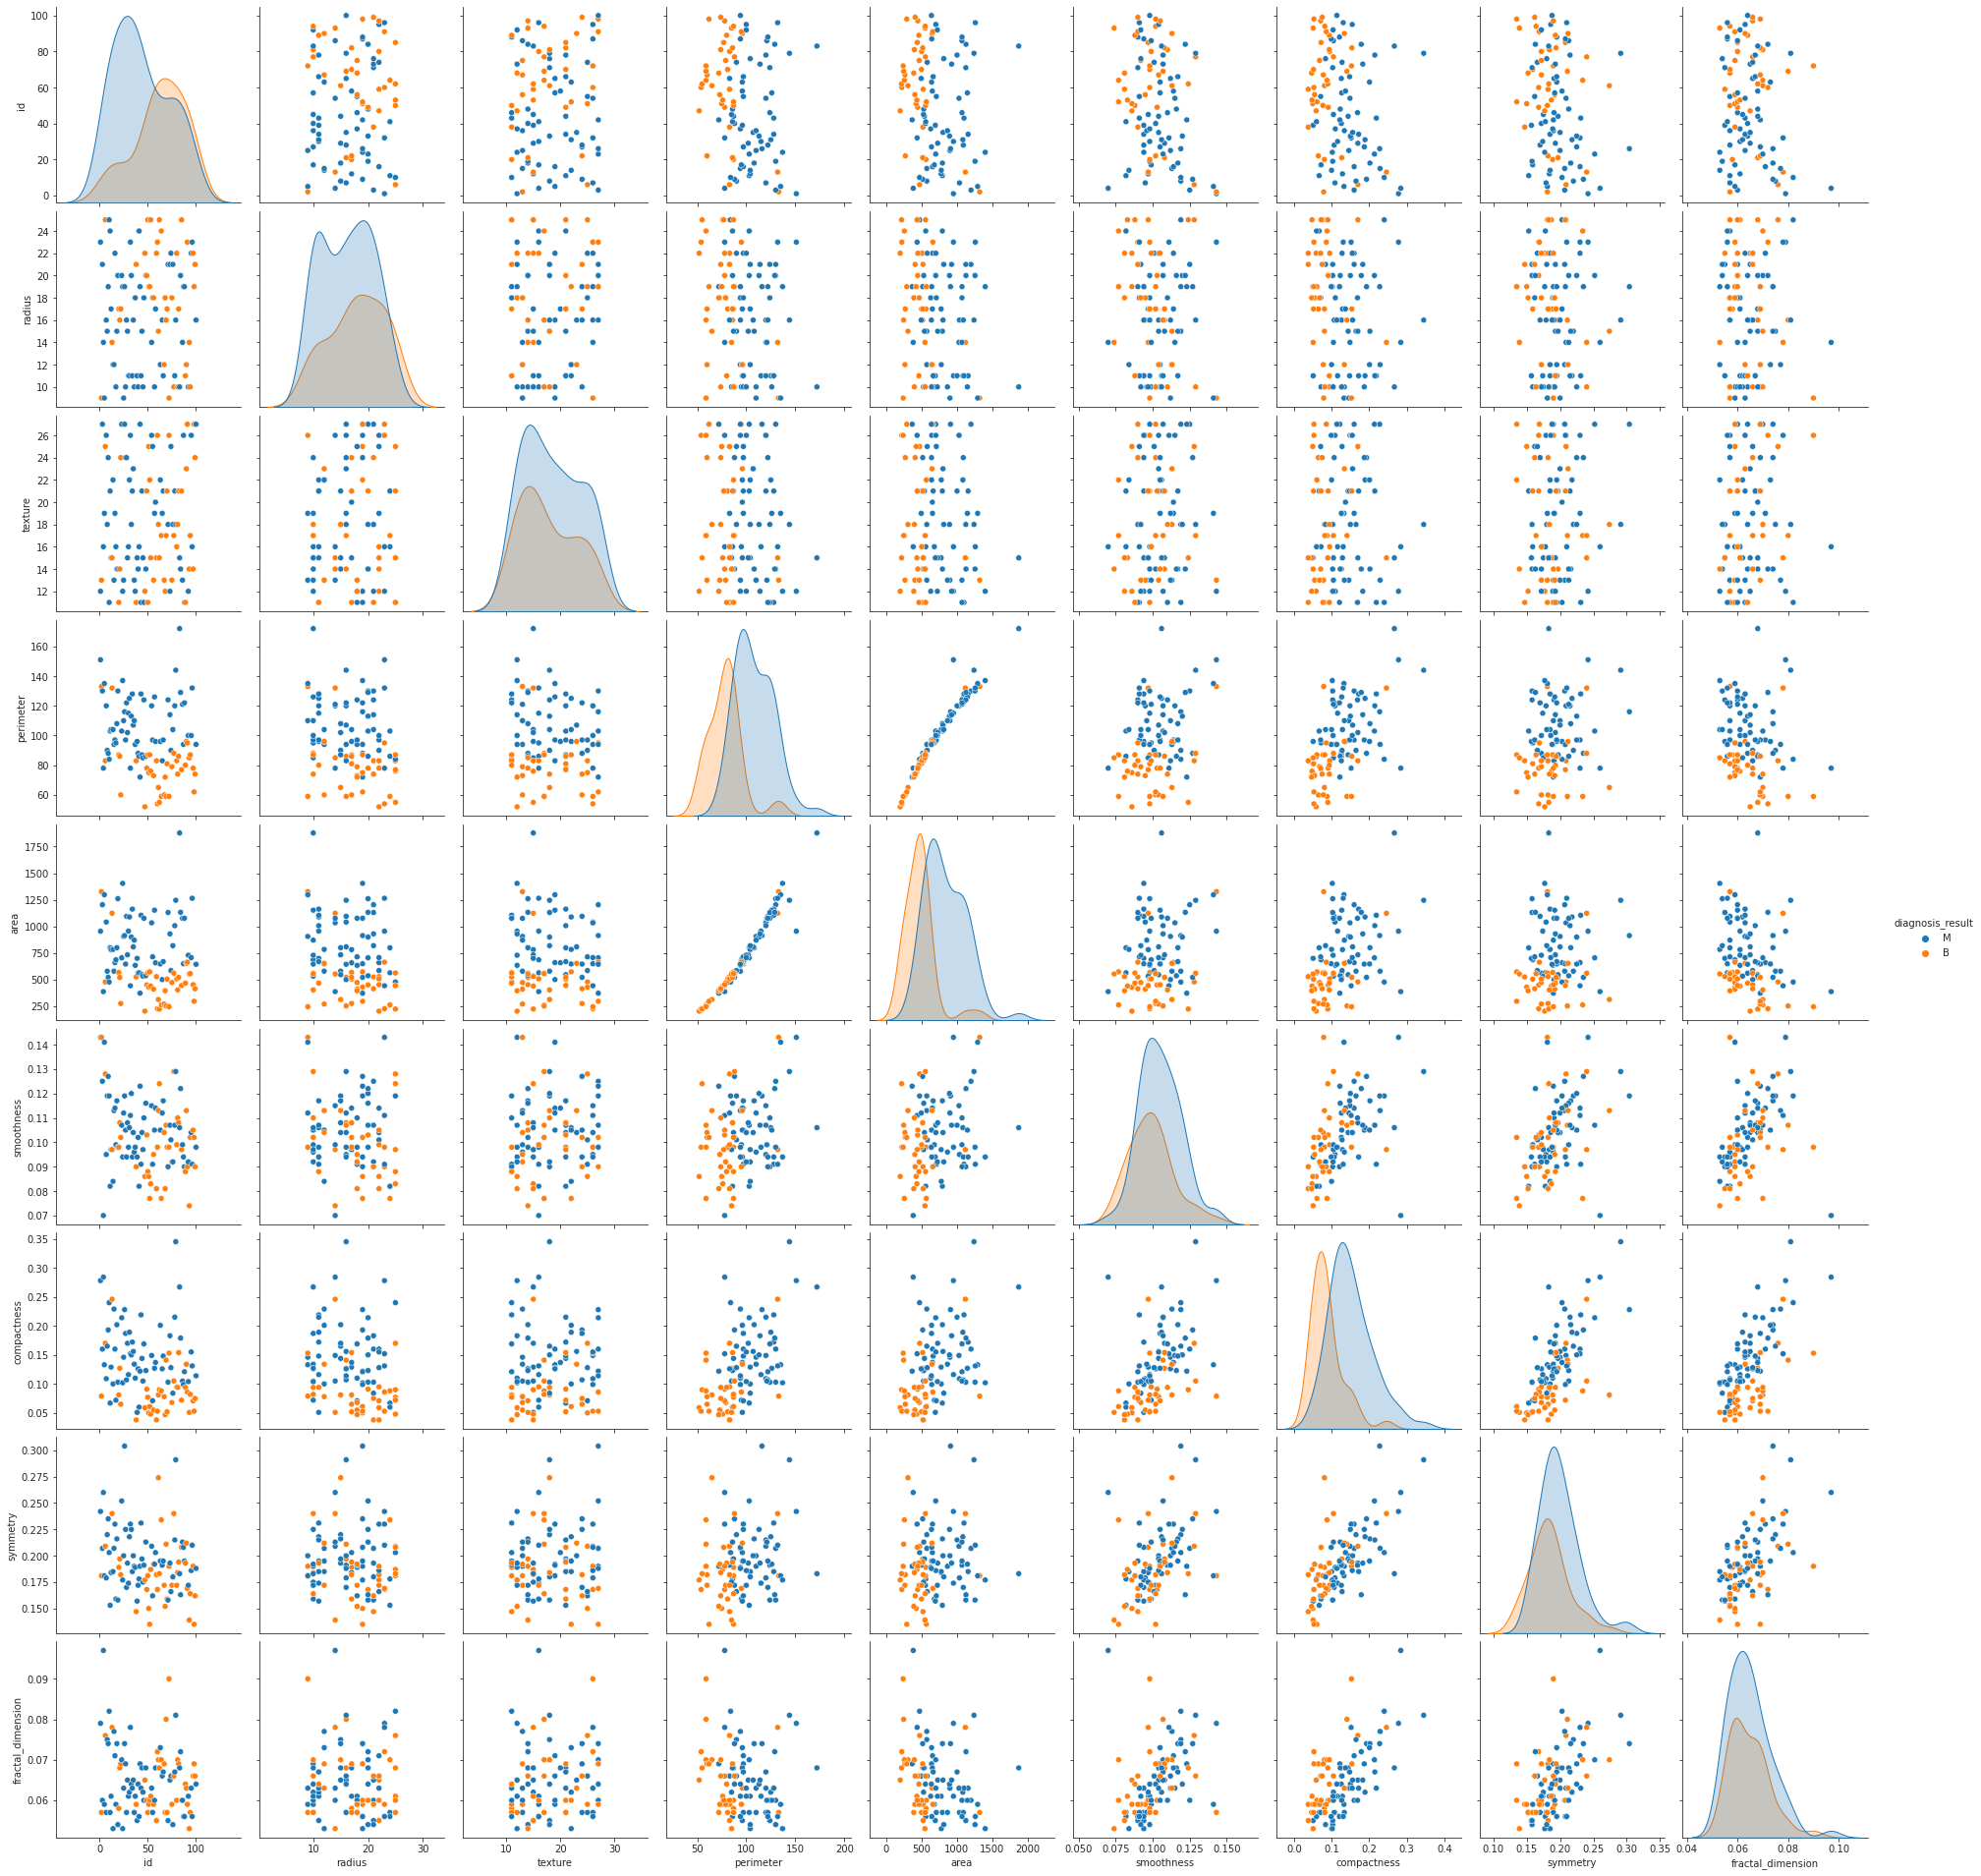

In [1522]:
sns.set_style("ticks")
sns.pairplot(df,hue="diagnosis_result",size=3);
plt.show()

# Removing features with 0 variance

In [1523]:
constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(X_train)
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)

X_train.shape, X_test.shape

((68, 7), (30, 7))

# Scaling the data

In [1524]:
mm_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(mm_scaler.fit_transform(X_train))
X_test = pd.DataFrame(mm_scaler.transform(X_test))

# Training the model

In [1525]:
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Random Forest

In [1526]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced",n_estimators=200,random_state = 1)
rf.fit(X_train, y_train.values.ravel())
y_pred=rf.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
print("accuracy Score is {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 80.00%
accuracy Score is 80.00%


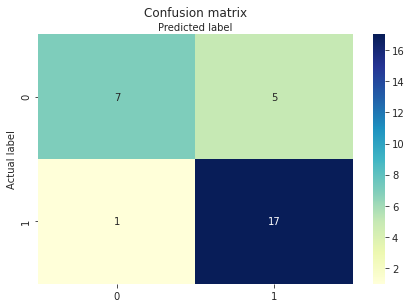

              precision    recall  f1-score   support

           B       0.88      0.58      0.70        12
           M       0.77      0.94      0.85        18

    accuracy                           0.80        30
   macro avg       0.82      0.76      0.78        30
weighted avg       0.81      0.80      0.79        30

accuracy Score is 80.00%


In [1527]:
# make class predictions with the model
y_pred = rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Naive Bayes

In [1528]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train, y_train.values.ravel())

# y_pred=nb.predict(X_test)
# acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

# print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

In [1529]:
# # make class predictions with the model
# y_pred = nb.predict(X_test)
# cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
# conf_matrix(cnf_matrix,y_test)
# # calculate prediction
# report = classification_report(y_pred,y_test)
# print(report)

# Suport Vector Machine

In [1530]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train.values.ravel())

y_pred=svm.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 80.00%


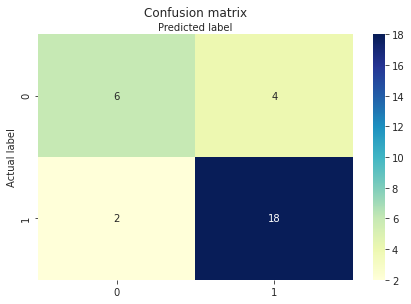

              precision    recall  f1-score   support

           B       0.75      0.60      0.67        10
           M       0.82      0.90      0.86        20

    accuracy                           0.80        30
   macro avg       0.78      0.75      0.76        30
weighted avg       0.80      0.80      0.79        30



In [1531]:
# make class predictions with the model
y_pred = svm.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

# KNN 

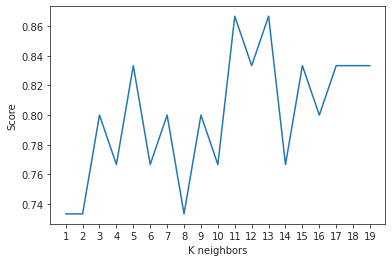

Maximum KNN Score is 86.67%
accuracy Score is 86.67%


In [1532]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# try ro find best k value
score = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train.values.ravel())
    score.append(knn.score(X_test, y_test.values.ravel()))
    
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K neighbors")
plt.ylabel("Score")
plt.show()

acc = max(score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("accuracy Score is {:.2f}%".format(acc))

In [1533]:
knn = KNeighborsClassifier(n_neighbors =11)  # n_neighbors means k
knn.fit(X_train, y_train.values.ravel())   

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

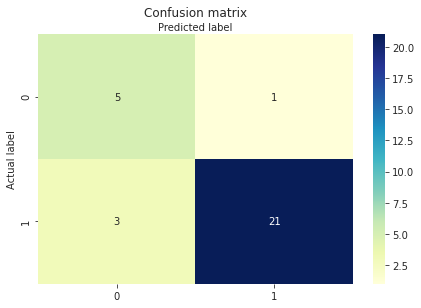

              precision    recall  f1-score   support

           B       0.62      0.83      0.71         6
           M       0.95      0.88      0.91        24

    accuracy                           0.87        30
   macro avg       0.79      0.85      0.81        30
weighted avg       0.89      0.87      0.87        30

accuracy Score is 86.67%


In [1534]:
# make class predictions with the model
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Logistic Regression

In [1535]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=30)
logreg.fit(X_train, y_train.values.ravel())
y_pred=logreg.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistic Regression Algorithm: 86.67%


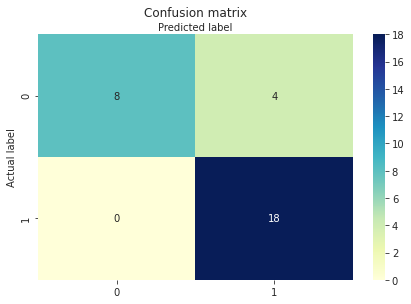

              precision    recall  f1-score   support

           B       1.00      0.67      0.80        12
           M       0.82      1.00      0.90        18

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30

accuracy Score is 86.67%


In [1536]:
# make class predictions with the model
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Neural Network

In [1537]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train.replace({'B':0,'M':1}), epochs=100, batch_size=8)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test.replace({'B':0,'M':1}))


print("accuracy Score is {:.2f}%".format(acc))

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.7194 - accuracy: 0.5592
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.4664
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.4951
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6210
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4995
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6214
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6532
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6705
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5050
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5421
Epoch 11/100
9/9 [===========

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


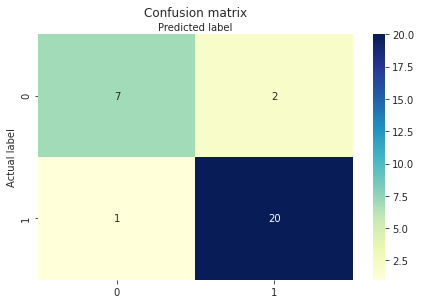

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.91      0.95      0.93        21

    accuracy                           0.90        30
   macro avg       0.89      0.87      0.88        30
weighted avg       0.90      0.90      0.90        30

accuracy Score is 86.67%


In [1538]:
# make class predictions with the model
y_pred = model.predict_classes(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test.replace({'B':0,'M':1}))
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test.replace({'B':0,'M':1}))
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Esemble models

In [1539]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('lr', logreg), ('rf', knn)],
                         voting='hard')
eclf1 = eclf1.fit(X_train, y_train.values.ravel())
print(eclf1.predict(X_test))
eclf2 = VotingClassifier(estimators=[('lr', logreg), ('rf', knn)],voting='soft')
eclf2 = eclf2.fit(X_train, y_train.values.ravel())
print(eclf2.predict(X_test))

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M']
['B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M']


## First esemble

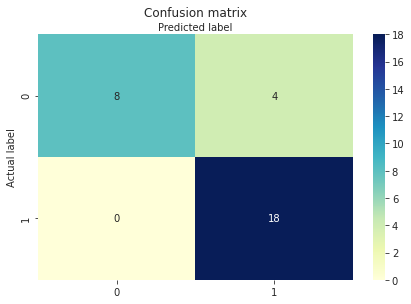

              precision    recall  f1-score   support

           B       1.00      0.67      0.80        12
           M       0.82      1.00      0.90        18

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30

accuracy Score is 86.67%


In [1540]:
# make class predictions with the model
y_pred = eclf1.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

## Second esemble

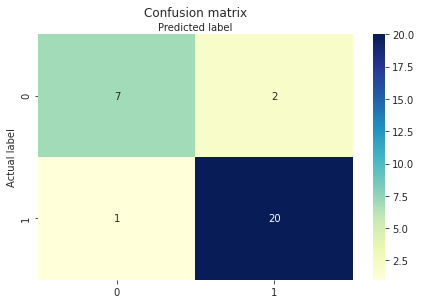

              precision    recall  f1-score   support

           B       0.88      0.78      0.82         9
           M       0.91      0.95      0.93        21

    accuracy                           0.90        30
   macro avg       0.89      0.87      0.88        30
weighted avg       0.90      0.90      0.90        30

accuracy Score is 86.67%


In [1541]:
# make class predictions with the model
y_pred = eclf2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

print("accuracy Score is {:.2f}%".format(acc))

# Recommendation

100 data points I consider is a low amount of data to work, anyway it gave a decent result for experimentation, It can have better performance with larger amounts of data.